In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [296]:
# Чтение данных из файла 'Calls_and_leads.csv' в DataFrame
data = pd.read_csv('Calls_and_leads.csv')

In [297]:
data.head(20)

,Дата,№ прозвона,id базы,Регион,Дозвонов,Лидов,Выдачи,% в лиды от дозвона
0,12/3/2021,1,0.0,Алтайский край,109,3,0,2.75%
1,12/3/2021,1,0.0,Амурская область,46,0,0,0.00%
2,12/3/2021,1,0.0,Архангельская область,46,2,0,4.35%
3,12/3/2021,1,0.0,Архангельская область и Ненецкий автономный округ,35,0,0,0.00%
4,12/3/2021,1,0.0,Астраханская область,40,2,0,5.00%
5,12/3/2021,1,0.0,Белгородская область,118,1,0,0.85%
6,12/3/2021,1,0.0,Брянская область,50,0,0,0.00%
7,12/3/2021,1,0.0,Владимирская область,79,0,0,0.00%
8,12/3/2021,1,0.0,Волгоградская область,94,0,0,0.00%
9,12/3/2021,1,0.0,Вологодская область,68,1,0,1.47%


In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123982 entries, 0 to 123981
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Дата                 123982 non-null  object 
 1   № прозвона           123982 non-null  int64  
 2   id базы              123982 non-null  float64
 3   Регион               123982 non-null  object 
 4   Дозвонов             123982 non-null  object 
 5   Лидов                123982 non-null  int64  
 6   Выдачи               123982 non-null  int64  
 7   % в лиды от дозвона  123982 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 7.6+ MB


In [299]:
#Чистка данных: удаление запятых из числовых колонок 'Кол-во дозвонов' и '% в лиды от дозвона'
data['Дозвонов']= data['Дозвонов'].str.replace(',', '')
data['% в лиды от дозвона']= data['% в лиды от дозвона'].str.replace('%', '')

In [300]:
data.head()

,Дата,№ прозвона,id базы,Регион,Дозвонов,Лидов,Выдачи,% в лиды от дозвона
0,12/3/2021,1,0.0,Алтайский край,109,3,0,2.75
1,12/3/2021,1,0.0,Амурская область,46,0,0,0.00
2,12/3/2021,1,0.0,Архангельская область,46,2,0,4.35
3,12/3/2021,1,0.0,Архангельская область и Ненецкий автономный округ,35,0,0,0.00
4,12/3/2021,1,0.0,Астраханская область,40,2,0,5.00


In [301]:
# Преобразование значения колонки '№ прозвона' в строковый формат
data['№ прозвона'] = data['№ прозвона'].astype({
    '№ прозвона': str
})


In [302]:
# Преобразование значений колонок 'id базы' и 'Дозвонов' в строковый и числовой формат соответственно
# Преобразование значения '% в лиды от дозвона' во float (числовой формат с плавающей точкой)
data[['id базы', 'Дозвонов', '% в лиды от дозвона']] = data[['id базы', 'Дозвонов', '% в лиды от дозвона']].astype({
    'id базы': str, 'Дозвонов': int, '% в лиды от дозвона': float
})

In [305]:
data['Дата'] = pd.to_datetime(data['Дата'], format='%m/%d/%Y')

In [306]:
data.dtypes

Дата                   datetime64[ns]
№ прозвона                     object
id базы                        object
Регион                         object
Дозвонов                        int64
Лидов                           int64
Выдачи                          int64
% в лиды от дозвона           float64
dtype: object

In [307]:
# Округление значений столбца '% в лиды от дозвона' до одного десятичного знака
data['% в лиды от дозвона'] = round(data['% в лиды от дозвона'], 1)

In [308]:
# Чтение данных из файла 'Тестовое задание аналитиков - Ст. лида.csv' в DataFrame
lead_cost = pd.read_csv('Тестовое задание аналитиков - Ст. лида.csv')

In [218]:
lead_cost.head(20)

,% в лиды от дозвона,Стоимость лида
0,"0,10%",р.200
1,"0,20%",р.190
2,"0,30%",р.180
3,"0,40%",р.170
4,"0,50%",р.160
5,"0,60%",р.150
6,"0,70%",р.140
7,"0,80%",р.130
8,"0,90%",р.120
9,"1,00%",р.110


In [309]:
#Чистка данных: удаление запятых, '%', 'р.'  из числовых колонок '% в лиды от дозвона' и 'Стоимость лида'
lead_cost['% в лиды от дозвона'] = lead_cost['% в лиды от дозвона'].str.replace('%', '')
lead_cost['% в лиды от дозвона'] = lead_cost['% в лиды от дозвона'].str.replace(',', '.')
lead_cost['Стоимость лида'] = lead_cost['Стоимость лида'].str.replace('р.', '')

/var/folders/rn/f66c53fd5sq6nrj7szj_z_l80000gn/T/ipykernel_1453/3573231406.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  lead_cost['Стоимость лида'] = lead_cost['Стоимость лида'].str.replace('р.', '')


In [310]:
lead_cost.head(20)

,% в лиды от дозвона,Стоимость лида
0,0.10,200
1,0.20,190
2,0.30,180
3,0.40,170
4,0.50,160
5,0.60,150
6,0.70,140
7,0.80,130
8,0.90,120
9,1.00,110


In [311]:
# Преобразование значений колонок '% в лиды от дозвона' и 'Стоимость лида' в числовой формат соответственно
lead_cost[['% в лиды от дозвона', 'Стоимость лида']] = lead_cost[['% в лиды от дозвона', 'Стоимость лида']].astype({
    '% в лиды от дозвона': float, 
    'Стоимость лида': int})
lead_cost.dtypes

% в лиды от дозвона    float64
Стоимость лида           int64
dtype: object

**1. Выяснить сколько мы зарабатываем на 1 звонок, если будем звонить конкретный регион по каждой базе, если за каждый выданный продукт нам платят 1000 р**

In [312]:
#рассчет общей стоимости лидов на основе информации из двух таблиц

for i in range(len(lead_cost)):
    for j in range(len(data)):
        if data['% в лиды от дозвона'].iloc[j] == lead_cost['% в лиды от дозвона'].iloc[i] and data['% в лиды от дозвона'].iloc[j] != 0:
            data.at[j, 'Стоимость от Лидов'] = data['Лидов'].iloc[j] * lead_cost['Стоимость лида'].iloc[i]
        elif data['% в лиды от дозвона'].iloc[j] >= 2:
            data.at[j, 'Стоимость от Лидов'] = data['Лидов'].iloc[j] * 10
        else:
            data.at[j, 'Стоимость от Лидов'] = data['Лидов'].iloc[j] * 200


In [313]:
data.head(20)

,Дата,№ прозвона,id базы,Регион,Дозвонов,Лидов,Выдачи,% в лиды от дозвона,Стоимость от Лидов
0,2021-12-03,1,0.0,Алтайский край,109,3,0,2.8,30.0
1,2021-12-03,1,0.0,Амурская область,46,0,0,0.0,0.0
2,2021-12-03,1,0.0,Архангельская область,46,2,0,4.4,20.0
3,2021-12-03,1,0.0,Архангельская область и Ненецкий автономный округ,35,0,0,0.0,0.0
4,2021-12-03,1,0.0,Астраханская область,40,2,0,5.0,20.0
5,2021-12-03,1,0.0,Белгородская область,118,1,0,0.8,200.0
6,2021-12-03,1,0.0,Брянская область,50,0,0,0.0,0.0
7,2021-12-03,1,0.0,Владимирская область,79,0,0,0.0,0.0
8,2021-12-03,1,0.0,Волгоградская область,94,0,0,0.0,0.0
9,2021-12-03,1,0.0,Вологодская область,68,1,0,1.5,200.0


In [314]:
#рассчет общей стоимости от продукта, если за каждый выданный продукт нам платят 1000 р
data['Стоимость от продукта'] = data['Выдачи']*1000

In [315]:
# Группируем данные по региону и id базы, и суммируем количество дозвонов, лидов, стоимость от лидов и стоимость от продукта
grouped_df = data.groupby(['Регион', 'id базы']).agg({
    'Дозвонов': 'sum',
    'Лидов': 'sum',
    'Стоимость от Лидов': 'sum',
    'Стоимость от продукта': 'sum'
}).reset_index()
grouped_df

,Регион,id базы,Дозвонов,Лидов,Стоимость от Лидов,Стоимость от продукта
0,Абзелиловский район и Белорецкий район,34.5,1,0,0.0,0
1,Алтайский край,0.0,153432,988,191140.0,65000
2,Алтайский край,100.5,9980,59,11230.0,6000
3,Алтайский край,144.5,16185,74,14800.0,10000
4,Алтайский край,153.0,14,1,10.0,0
...,...,...,...,...,...,...
8917,г. Санкт-Петербург и Ленинградская область,947.5,608,1,200.0,0
8918,г. Санкт-Петербург и Ленинградская область,97.0,11723,52,10400.0,3000
8919,г. Санкт-Петербург и Ленинградская область,972.0,454,0,0.0,0
8920,г. Санкт-Петербург и Ленинградская область,987.0,20,0,0.0,0


In [316]:
# Рассчитываем стоимость лида на 1 звонок
grouped_df['Стоимость лида на 1 звонок'] = grouped_df['Стоимость от Лидов'] / grouped_df['Дозвонов']
grouped_df

,Регион,id базы,Дозвонов,Лидов,Стоимость от Лидов,Стоимость от продукта,Стоимость лида на 1 звонок
0,Абзелиловский район и Белорецкий район,34.5,1,0,0.0,0,0.000000
1,Алтайский край,0.0,153432,988,191140.0,65000,1.245764
2,Алтайский край,100.5,9980,59,11230.0,6000,1.125251
3,Алтайский край,144.5,16185,74,14800.0,10000,0.914427
4,Алтайский край,153.0,14,1,10.0,0,0.714286
...,...,...,...,...,...,...,...
8917,г. Санкт-Петербург и Ленинградская область,947.5,608,1,200.0,0,0.328947
8918,г. Санкт-Петербург и Ленинградская область,97.0,11723,52,10400.0,3000,0.887145
8919,г. Санкт-Петербург и Ленинградская область,972.0,454,0,0.0,0,0.000000
8920,г. Санкт-Петербург и Ленинградская область,987.0,20,0,0.0,0,0.000000


In [318]:
# Рассчитываем прибыль на 1 звонок
grouped_df['Прибыль на 1 звонок'] = (grouped_df['Стоимость от Лидов'] + grouped_df['Стоимость от продукта']) / grouped_df['Дозвонов']
grouped_df.sort_values(by=['Регион', 'Прибыль на 1 звонок'], ascending=[True, False]).head()


,Регион,id базы,Дозвонов,Лидов,Стоимость от Лидов,Стоимость от продукта,Стоимость лида на 1 звонок,Прибыль на 1 звонок
0,Абзелиловский район и Белорецкий район,34.5,1,0,0.0,0,0.000000,0.000000
46,Алтайский край,400.0,173,4,230.0,1000,1.329480,7.109827
11,Алтайский край,219.5,1312,18,3600.0,3000,2.743902,5.030488
79,Алтайский край,80.0,231,4,40.0,1000,0.173160,4.502165
54,Алтайский край,598.5,473,5,1000.0,1000,2.114165,4.228330


In [319]:
# Группируем данные по региону, и суммируем количество дозвонов, лидов, стоимость от лидов и стоимость от продукта
grouped_region = data.groupby(['Регион']).agg({
    'Дозвонов': 'sum',
    'Лидов': 'sum',
    'Стоимость от Лидов': 'sum',
    'Стоимость от продукта': 'sum'
}).reset_index()
grouped_region

,Регион,Дозвонов,Лидов,Стоимость от Лидов,Стоимость от продукта
0,Абзелиловский район и Белорецкий район,1,0,0.0,0
1,Алтайский край,1224120,7946,1543030.0,658000
2,Амурская область,230860,1840,314230.0,162000
3,Архангельская область,277406,2036,334430.0,177000
4,Архангельская область и Ненецкий автономный округ,128189,789,114290.0,78000
...,...,...,...,...,...
89,Чукотский АО,7843,72,2240.0,2000
90,Ямало-Ненецкий АО,424443,3396,580590.0,290000
91,Ярославская область,591634,2904,548120.0,323000
92,г. Москва и Московская область,10385798,46426,9190010.0,4466000


In [320]:
# Рассчитываем прибыль на 1 звонок по региону
grouped_region['Прибыль на 1 звонок'] = (grouped_region['Стоимость от Лидов'] + grouped_region['Стоимость от продукта']) / grouped_region['Дозвонов']
grouped_region.sort_values(by=['Прибыль на 1 звонок'], ascending= False).head(20)

,Регион,Дозвонов,Лидов,Стоимость от Лидов,Стоимость от продукта,Прибыль на 1 звонок
13,Забайкальский край,345542,3420,581210.0,268000,2.457617
48,Республика Бурятия,250795,2502,370060.0,193000,2.245101
60,Республика Саха /Якутия/,333674,2973,511000.0,219000,2.187764
65,Республика Хакасия,203080,1661,269690.0,168000,2.155259
15,Иркутская область,1140877,8737,1700280.0,729000,2.129309
39,Оренбургская область,892345,6809,1291880.0,606000,2.126846
2,Амурская область,230860,1840,314230.0,162000,2.062852
71,Сахалинская область,163798,1274,216230.0,120000,2.052711
90,Ямало-Ненецкий АО,424443,3396,580590.0,290000,2.051135
83,Ханты-Мансийский АО-Югра,276843,2066,352970.0,209000,2.029923


В таблице представлено топ 20 регионов, которые приносят наибольшую прибыль на 1 звонок.

 **2. Выяснить сколько мы зарабатываем на 1 звонок по каждой конкретной базе**

In [321]:
# Группируем данные по id базы, и суммируем количество дозвонов, лидов, стоимость от лидов и стоимость от продукта
grouped_base = data.groupby(['id базы']).agg({
    'Дозвонов': 'sum',
    'Лидов': 'sum',
    'Стоимость от Лидов': 'sum',
    'Стоимость от продукта': 'sum'
}).reset_index()

In [322]:
# Рассчитываем прибыль на 1 звонок
grouped_base['Прибыль на 1 звонок'] = (grouped_base['Стоимость от Лидов'] + grouped_base['Стоимость от продукта']) / grouped_base['Дозвонов']
grouped_base.sort_values(by=['Прибыль на 1 звонок'], ascending= False).head(20)

,id базы,Дозвонов,Лидов,Стоимость от Лидов,Стоимость от продукта,Прибыль на 1 звонок
54,400.5,115739,1399,233820.0,121000,3.065691
110,80.0,904635,9614,1726340.0,916000,2.920891
39,34.5,1286527,12975,2422860.0,1273000,2.872742
11,219.5,129411,1405,227230.0,125000,2.721793
41,349.5,185992,1926,353280.0,146000,2.684417
28,250.5,121908,1420,223770.0,89000,2.565623
108,779.5,4,1,10.0,0,2.500000
58,456.0,503636,4765,877190.0,371000,2.478357
53,400.0,62683,558,96210.0,52000,2.364437
55,401.0,117709,1224,209460.0,67000,2.348673


На основе анализа данных получили те базы, которые приносят наибольшую прибыль на 1 звонок.

**3. Как мы можем звонить, получая больше выгоды с каждой конкретной базы.**

Для того чтобы звонить, получая больше выгоды с каждой конкретной базы, можно использовать данные из grouped_df и grouped_base таблиц. Они содержат информацию о различных базах, регионах, количестве дозвонов, количестве лидов, стоимости лида и стоимости продукта.

In [323]:
# Группировка данных в dataframe grouped_df по столбцу 'Регион' и определение максимальной прибыли на 1 звонок для каждого региона
max_profit = grouped_df.groupby(['Регион']).agg({'Прибыль на 1 звонок': 'max'})

max_profit.head(20)

,Прибыль на 1 звонок
Регион,
Абзелиловский район и Белорецкий район,0.000000
Алтайский край,7.109827
Амурская область,7.476636
Архангельская область,21.428571
Архангельская область и Ненецкий автономный округ,22.954545
Астраханская область,15.937500
Белгородская область,15.454545
Брянская область,11.764706
Владимирская область,5.072765


In [324]:
# Объединение данных из dataframe grouped_df и dataframe max_profit по столбцам 'Регион' и 'Прибыль на 1 звонок'
merge_df = pd.merge(grouped_df, max_profit, on =['Регион','Прибыль на 1 звонок'])
# Вывод столбцов 'Регион', 'id базы' и 'Прибыль на 1 звонок', сортировка по столбцу 'Прибыль на 1 звонок' в порядке убывания (ascending=False)
merge_df[['Регион','id базы', 'Прибыль на 1 звонок']].sort_values(by= ['Прибыль на 1 звонок'], ascending=False).head(10)

,Регион,id базы,Прибыль на 1 звонок
37,Курганская область,88.0,112.222222
14,Ивановская область,610.5,112.222222
64,Республика Коми,549.5,84.166667
107,Ярославская область,648.0,72.142857
19,Камчатский край,231.5,59.411765
89,Смоленская область,623.0,59.411765
106,Ямало-Ненецкий АО,361.5,48.095238
45,Новгородская область,947.5,42.083333
92,Тверская область,623.0,37.407407
20,Карачаево-Черкесская Республика,214.5,31.562500


Объединяем данные из dataframe grouped_df и dataframe max_profit по столбцам 'Регион' и 'Прибыль на 1 звонок'. Это позволяет объединить информацию о максимальной прибыли на 1 звонок для каждого региона с исходной информацией о регионах и базах.
С помощью сортировки данных по столбцу 'Прибыль на 1 звонок' в порядке убывания, выводим строки с наибольшими значениями 'Прибыль на 1 звонок', что позволяет нам идентифицировать наиболее прибыльные регионы и базы на основе максимальной прибыли на 1 звонок.

**Анализ эффективности баз с точки зрения конверсии (отношения количества лидов к количеству дозвонов).** 

In [325]:
# Рассчитаем процент конверсии для каждой базы в первой таблице grouped_base
grouped_base['Процент конверсии'] = (grouped_base['Лидов'] / grouped_base['Дозвонов']) * 100
# Выводим базы с наибольшим процентом конверсии (наиболее эффективные)
most_efficient_bases_df1 = grouped_base.sort_values(by = ['Процент конверсии'], ascending=False).head()
most_efficient_bases_df1[['id базы', 'Дозвонов', 'Лидов', 'Процент конверсии']].head()

,id базы,Дозвонов,Лидов,Процент конверсии
108,779.5,4,1,25.000000
21,233.5,1478,120,8.119080
123,925.0,26564,976,3.674145
16,229.5,335,12,3.582090
116,873.0,67161,1546,2.301931


In [326]:
# Выводим базы с наименьшим процентом конверсии (наименее эффективные)
least_efficient_bases_df1 = grouped_base.sort_values(by='Процент конверсии', ascending=True)
least_efficient_bases_df1[['id базы', 'Дозвонов', 'Лидов', 'Процент конверсии']].head()

,id базы,Дозвонов,Лидов,Процент конверсии
15,224.5,821,0,0.000000
88,648.5,1218,1,0.082102
127,945.5,3739,4,0.106980
132,987.0,4224,7,0.165720
30,254.0,37124,63,0.169702


In [327]:
# Рассчитаем процент конверсии для каждой базы по регионам в таблице grouped_df
grouped_df['Процент конверсии'] = (grouped_df['Лидов'] / grouped_df['Дозвонов']) * 100
# Выводим базы с наибольшим процентом конверсии (наиболее эффективные)
most_efficient_bases_df2 = grouped_df.sort_values(by='Процент конверсии', ascending=False)
most_efficient_bases_df2[['Регион','id базы', 'Дозвонов', 'Лидов', 'Процент конверсии']].head()

,Регион,id базы,Дозвонов,Лидов,Процент конверсии
7920,Ханты-Мансийский-Югра АО,217.0,1,1,100.000000
7048,Тамбовская область,631.5,1,1,100.000000
5082,Республика Карелия,233.5,3,2,66.666667
475,Астраханская область,905.5,2,1,50.000000
4240,Республика Адыгея,233.5,2,1,50.000000


In [328]:
# Выводим базы с наименьшим процентом конверсии (наименее эффективные)
least_efficient_bases_df2 = grouped_df.sort_values(by='Процент конверсии', ascending=True)
least_efficient_bases_df2[['Регион', 'id базы', 'Дозвонов', 'Лидов', 'Процент конверсии']].head()

,Регион,id базы,Дозвонов,Лидов,Процент конверсии
0,Абзелиловский район и Белорецкий район,34.5,1,0,0.0
4804,Республика Кабардино-Балкарская,232.5,91,0,0.0
4803,Республика Кабардино-Балкарская,231.5,44,0,0.0
4802,Республика Кабардино-Балкарская,231.0,3,0,0.0
4799,Республика Кабардино-Балкарская,220.0,68,0,0.0


Те базы, у которых процент конверсии выше, считаются более эффективными, так как они дают больше лидов относительно числа дозвонов, что может в свою очередь повысить прибыльность звонков.
Анализ данных о конверсии позволяет выделить базы с наиболее высокой и наиболее низкой эффективностью в привлечении лидов. Для повышения эффективности работы с потенциальными клиентами, рекомендуется сосредотачиваться на базах с более высокой конверсией, а также проводить дополнительные исследования и оптимизацию для баз с более низкой конверсией.

**4. Выявить зависимости, описать их в свободной форме.**

**Корреляции и зависимости**

In [332]:
correlation_df1 = grouped_region[['Дозвонов', 'Лидов', 'Стоимость от Лидов', 'Стоимость от продукта']].corr()
correlation_df1[['Дозвонов', 'Лидов', 'Стоимость от Лидов', 'Стоимость от продукта']]

,Дозвонов,Лидов,Стоимость от Лидов,Стоимость от продукта
Дозвонов,1.000000,0.984385,0.985499,0.988370
Лидов,0.984385,1.000000,0.999765,0.996225
Стоимость от Лидов,0.985499,0.999765,1.000000,0.996295
Стоимость от продукта,0.988370,0.996225,0.996295,1.000000


In [333]:
correlation_df2 = grouped_base[['Дозвонов', 'Лидов', 'Стоимость от Лидов', 'Стоимость от продукта']].corr()
correlation_df2[['Дозвонов', 'Лидов', 'Стоимость от Лидов', 'Стоимость от продукта']]

,Дозвонов,Лидов,Стоимость от Лидов,Стоимость от продукта
Дозвонов,1.000000,0.974464,0.978648,0.968507
Лидов,0.974464,1.000000,0.999315,0.957551
Стоимость от Лидов,0.978648,0.999315,1.000000,0.962208
Стоимость от продукта,0.968507,0.957551,0.962208,1.000000


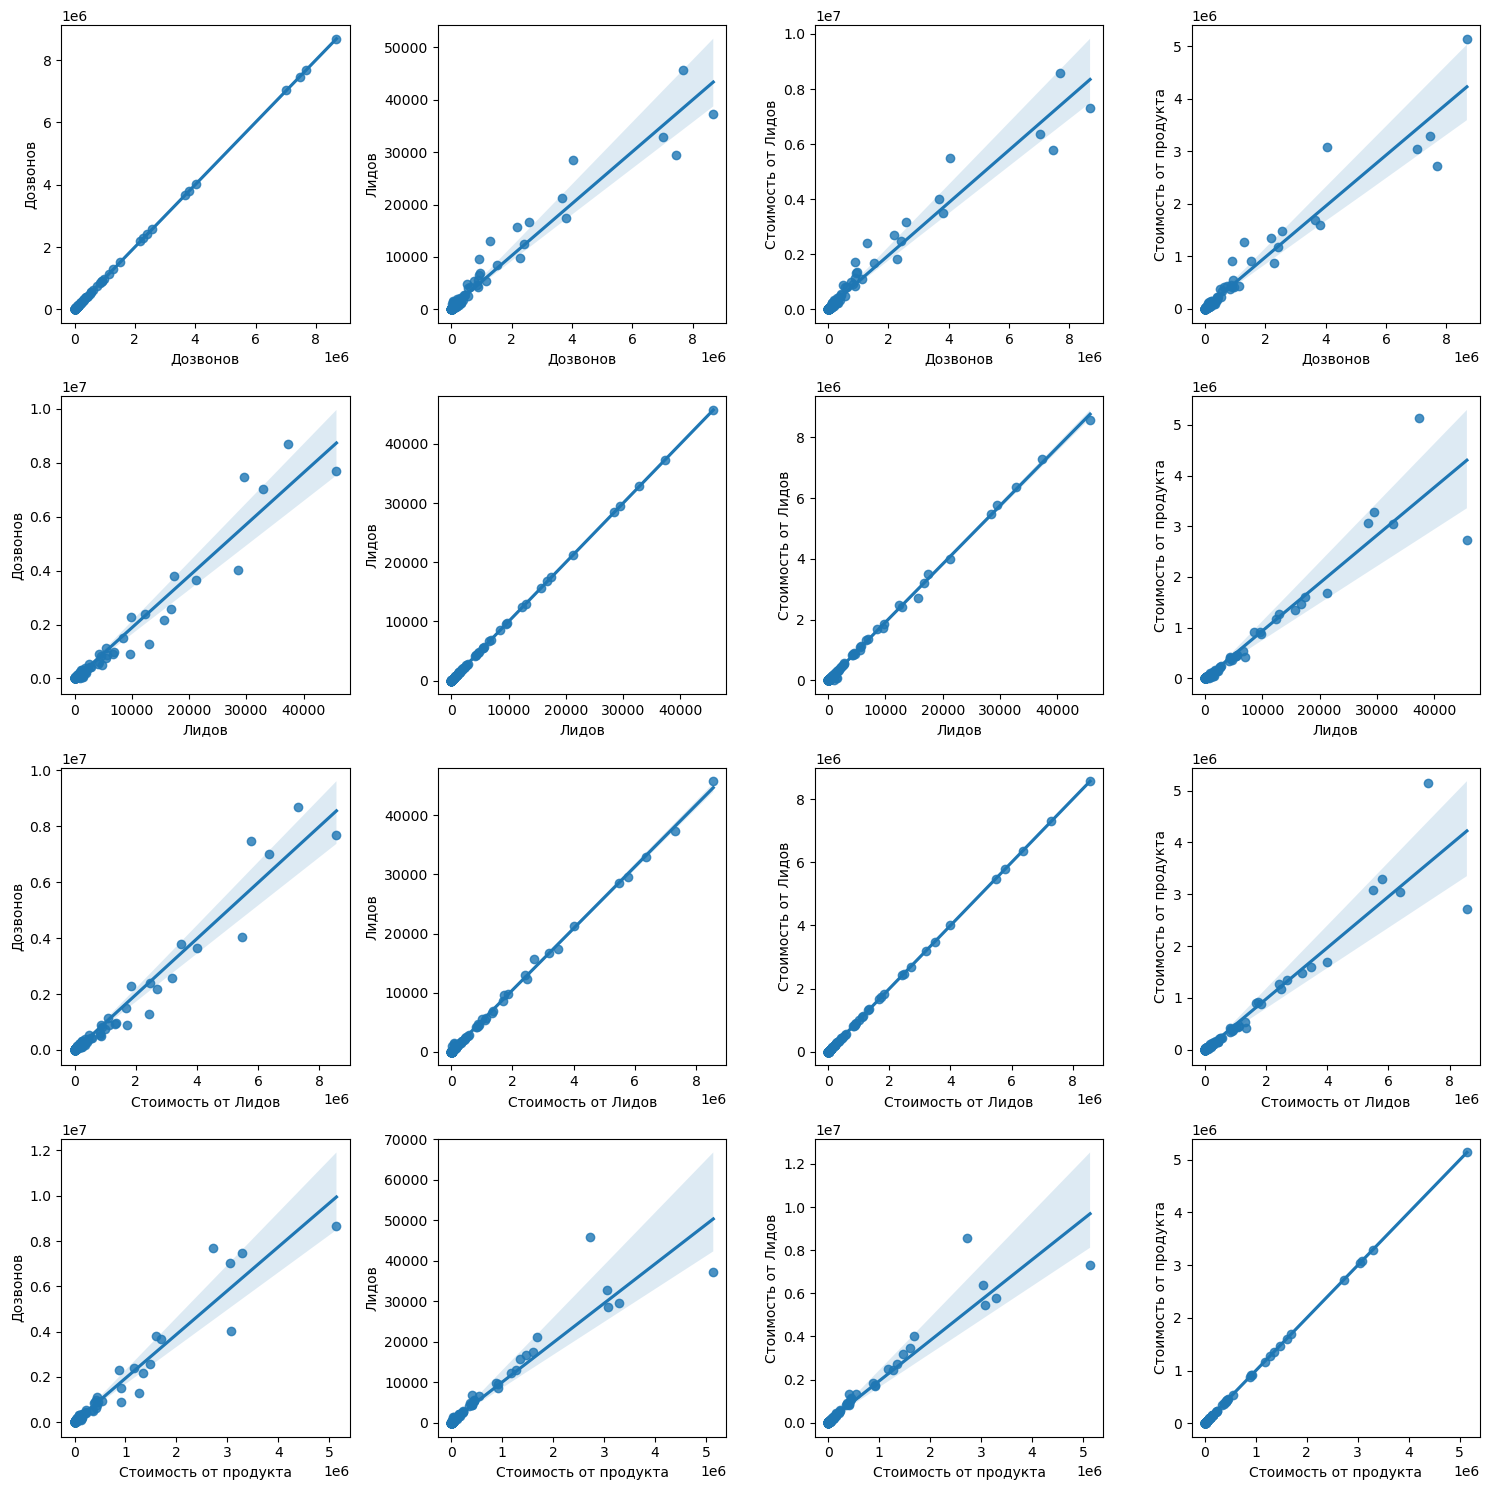

In [391]:
#  Построение регрессионных графиков на каждой комбинации переменных для таблицы grouped_base
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

axes = axes.flatten()

for i in range(1, 5):
    for j in range(1, 5):
        sns.regplot(x=grouped_base.columns[i], y=grouped_base.columns[j], data=grouped_base, ax=axes[(i-1) * 4+j-1])

plt.tight_layout()

plt.show()

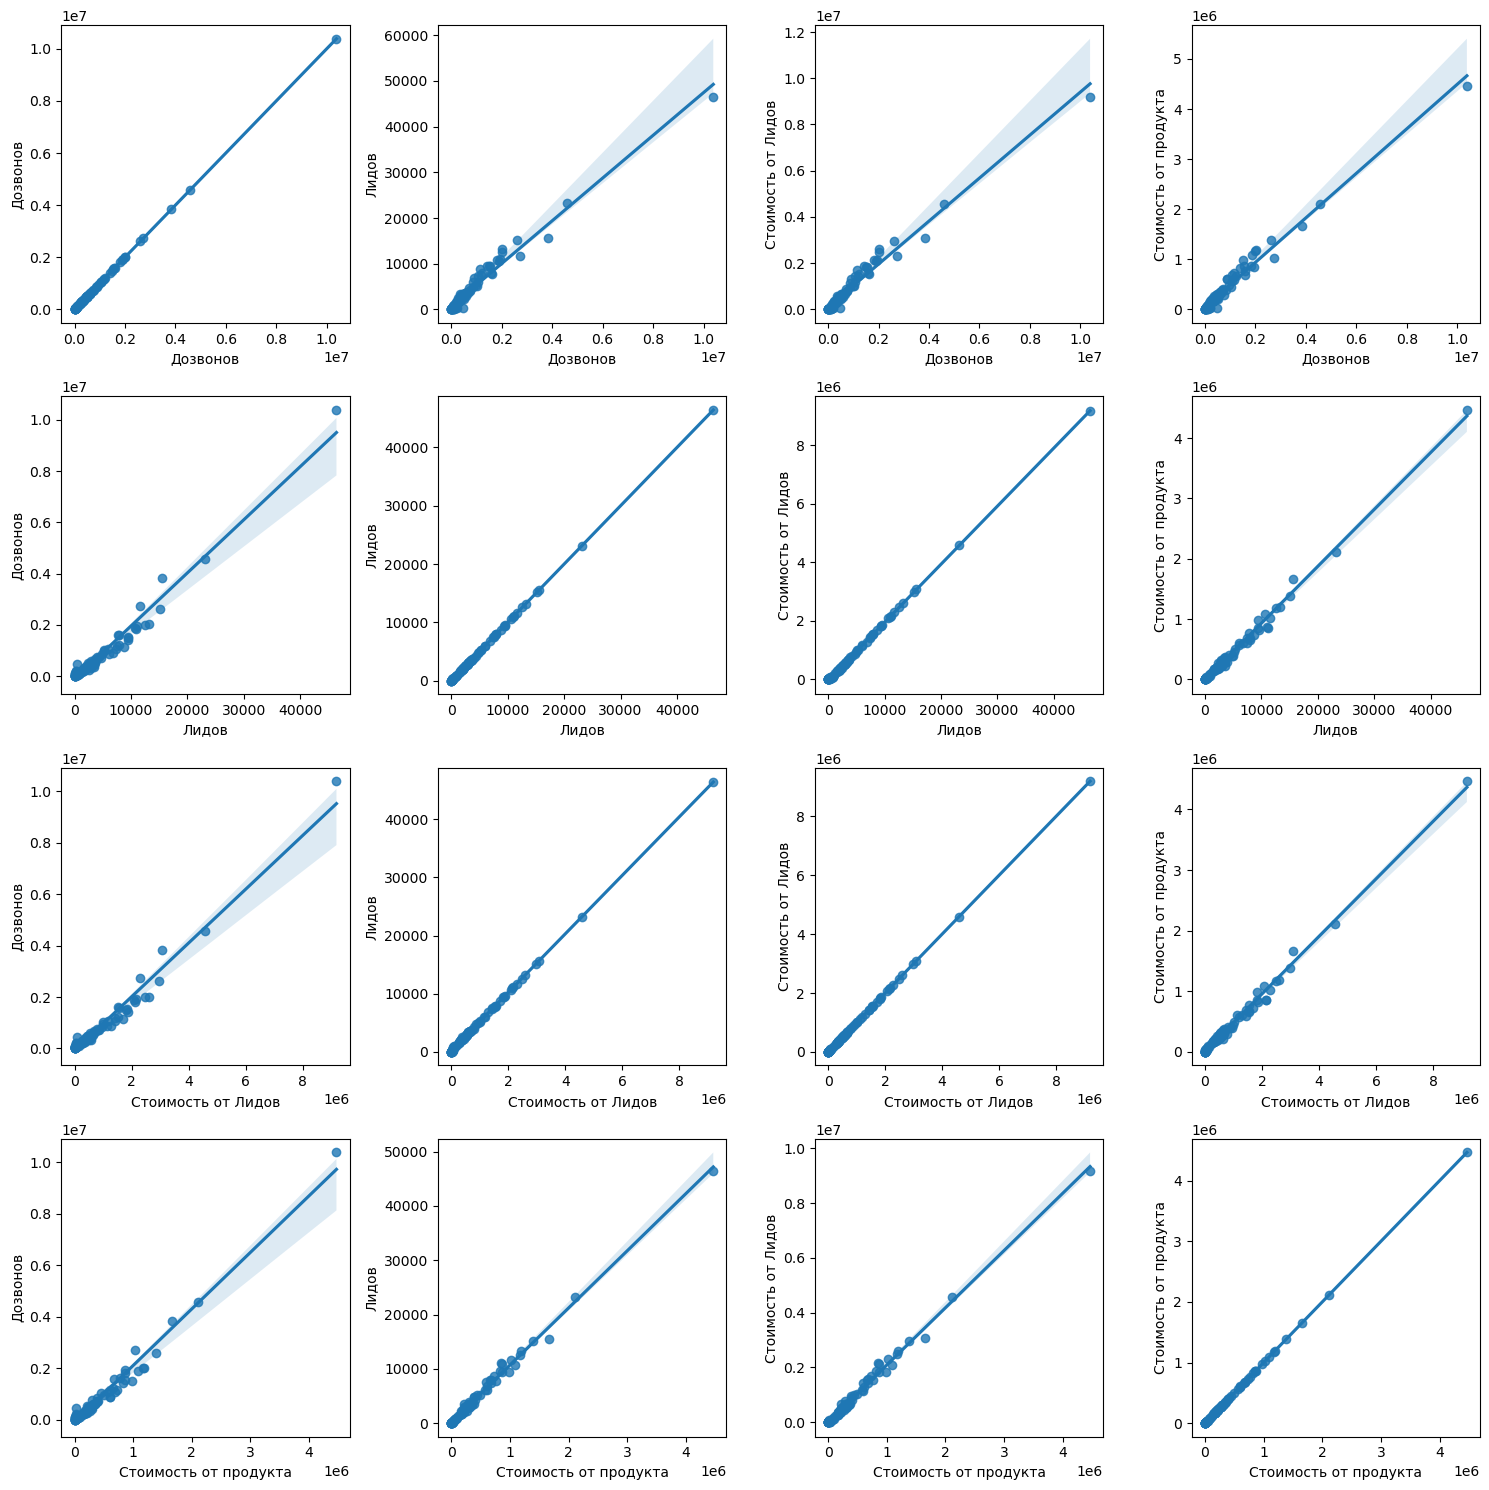

In [393]:
#  Построение регрессионных графиков на каждой комбинации переменных для таблицы grouped_region
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

axes = axes.flatten()

for i in range(1, 5):
    for j in range(1, 5):
        sns.regplot(x=grouped_region.columns[i], y=grouped_region.columns[j], data=grouped_region, ax=axes[(i-1) * 4+j-1])

plt.tight_layout()

plt.show()

Количества дозвонов, лидов и стоимость от лидов тесно связаны между собой и имеют высокие положительные корреляции. Значения коэффициентов корреляции для этих пар параметров приближаются к 1. Это указывает на то, что эти параметры сильно взаимосвязаны и увеличение одного из них обычно сопровождается увеличением другого.

Стоимость от продукта также имеет высокую положительную корреляцию с количеством дозвонов, лидов и стоимостью от лидов. Это может означать, что увеличение стоимости продукта связано с увеличением дозвонов и лидов, а также с увеличением стоимости лидов.